# Customer Churn Risk Prediction

## Problem Statement : 
    To predict whether the customer/client will terminate their relations with the company or not.

## Synopsis :
### Business Understanding ( What is happening in the Company )
    Suppose there is a X company(whether it is telecom, healthcare, gaming, banking, e-commerce, etc any types of company)  Suppose they launced a product and customer after using that product were not satisfied due to some reason and start switching to another Y company product and using it. 
    Here it means... that customer churn from X company and will more to Y company or in simple word people starting leaving your business.
    
    No business can thrive without it's customer.
    Customer leaving the business is just like a nightmare to that business owner.    

    In order to see that which customer can possibly leave the company , business owner need the " Customer Churn Score " of each customer.

## Now..... What is Customer Churn Score ???

### Customer Churn Score
    Customer Churn refers to the process of identifying all the possible customer or clients who will terminate their relations with the company. It is a very important factor for any organization as it used to estimate the growth of the organisation but also for predicting trends of future customers.
    The task in this project is to classify the customer on whether they will stay with the company or terminate their interrelation.
     
    One of the key metrics to measure a business' success is by measuring its customer churn rate - lower the chrun , the    more love towards the company.

## Task :
    We have to build a sophisticated Machine Learning model that predicts the churn score of a customer for a company based on multiple features.

## About Dataset :
    The dataset consists of parameters such as the user’s details, membership account details, duration and frequency of their visits to the website, points after purchasing and feedback, and many more.
    
### The dataset containing 2 files 
    Training files : contains total of 36992 records(rows) with 25 featutes(columns) including target variable.
    Testing files : contains total of 19909 records with 24 features and target variable is not present in it.
    
### About Null Value
    Dataset contains some null values in some features (i.e... columns).
    Some null values is in the form of '?' , 'Error' , 'Unknown' & need to be converted into "NAN" values. 
        
### Some important features of dataset
    points_in_wallet : Represents the points awarded to a customer on each transaction.
    membership_category : Represents the category of the membership that a customer is using like... Premium, Platinum etc.
    feedback : Represents the feedback provided by a customer.
    avg_transaction_value : Represents the average transaction value of a customer.
    avg_time_spent : Represents the average time spent by a customer on the website.
    
### About Target variable( In Training Data )
    churn_risk_score : Represents the churn risk score that ranges from 1 to 5.
        less churn score, more love towards the company.
        if high churn score...like 4 or 5 then customer/client can possibly leave the business.

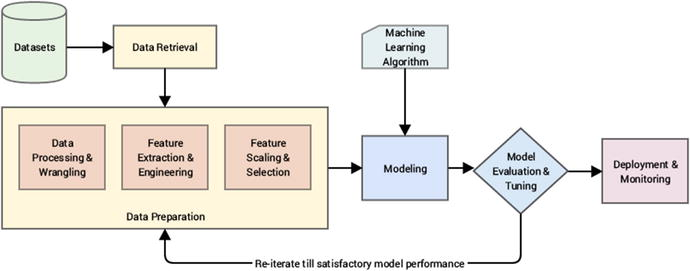

In [1]:
from IPython.display import Image
Image(r"C:\Users\Ninja Clasher\Desktop\Steps.jpg")

##### Importing Libraries

In [1]:
import numpy as np           # used for advanced mathematical opertion.
import pandas as pd          # used for analysing and handling data.

In [2]:
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# for ignoring warning
from warnings import filterwarnings
filterwarnings('ignore')

##### Importing Data

In [4]:
df = pd.read_csv(r'C:\Users\Ninja Clasher\Downloads\98efc33085a711eb\dataset\train.csv' , na_values = ['?','Error','Unknown'])

##### Analysing Data

In [5]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,NaN,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


##### Analysing target variable

In [6]:
df['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [7]:
#index_names = df[ df['churn_risk_score'] < 1 ].index
#index_names
df.drop(df[df['churn_risk_score'] < 1].index, inplace = True)

In [8]:
df['churn_risk_score'].value_counts()

3    10424
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

##### Dropping unnecessary features which will not help while building the model

In [9]:
df.drop(['customer_id', 'Name' , 'security_no' ,
       'referral_id', 'last_visit_time'] , axis = 1 , inplace = True)

In [10]:
df.info()       # Summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  int64  
 1   gender                        35773 non-null  object 
 2   region_category               30566 non-null  object 
 3   membership_category           35829 non-null  object 
 4   joining_date                  35829 non-null  object 
 5   joined_through_referral       30537 non-null  object 
 6   preferred_offer_types         35553 non-null  object 
 7   medium_of_operation           30599 non-null  object 
 8   internet_option               35829 non-null  object 
 9   days_since_last_login         35829 non-null  int64  
 10  avg_time_spent                35829 non-null  float64
 11  avg_transaction_value         35829 non-null  float64
 12  avg_frequency_login_days      32410 non-null  float64
 13  p

In [11]:
df.describe()       # Statistical data of the numerical features of a DataFrame

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,35829.000000,35829.000000,35829.000000,35829.000000,32410.000000,32488.000000,35829.000000
mean,37.120266,-42.143906,243.373859,29304.272306,15.963040,686.849231,3.608278
std,15.865360,229.254856,397.784650,19484.565419,9.205918,194.574486,1.176426
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,1.000000
25%,23.000000,8.000000,59.810000,14194.650000,9.000000,615.967500,3.000000
50%,37.000000,12.000000,161.620000,27584.530000,16.000000,697.820000,4.000000
75%,51.000000,16.000000,356.330000,40874.010000,23.000000,764.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


In [12]:
df.describe(include='O').T

,count,unique,top,freq
gender,35773,2,F,17892
region_category,30566,3,Town,13702
membership_category,35829,6,Basic Membership,7473
joining_date,35829,1096,2015-06-02,55
joined_through_referral,30537,2,No,15354
preferred_offer_types,35553,3,Gift Vouchers/Coupons,11977
medium_of_operation,30599,3,Desktop,13476
internet_option,35829,3,Wi-Fi,12016
used_special_discount,35829,2,Yes,19718
offer_application_preference,35829,2,Yes,19783


## EDA (Exploratory Data Analysis)

##### Checking for Null values

In [13]:
df.isnull().sum() 

age                                0
gender                            56
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral         5292
preferred_offer_types            276
medium_of_operation             5230
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        3419
points_in_wallet                3341
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

#### Checking Missing Values using " Bar Plot "

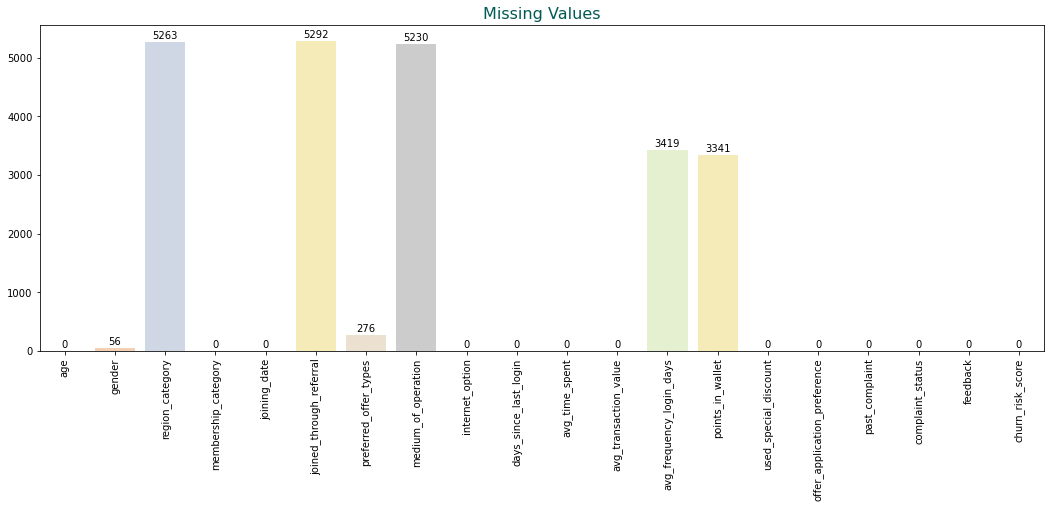

In [14]:
plt.figure(figsize=(18,6))
g = sns.barplot(x=df.columns, y=df.isna().sum(), palette='Pastel2')
plt.xticks(rotation=90)
plt.title('Missing Values', size=16, color = '#025955')

for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+20),ha='center', va='bottom',
               color= 'black')
    
plt.show()

#plt.tight_layout()

### From the above barplot we can see that there are 7 columns containg null value.
    
    Gender : 56 Null Value
    Region_category : 5263 Null Value
    Joined_through_referral : 5292 Null Value
    Preferred_offer_types : 276 Null Value
    Medium_of_operation : 5230 Null Value
    Avg_frequency_login_days : 3419 Null Value
    Points_in_wallet : 3341 Null Value

##### Handling Missing Categorical Data

In [15]:
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])

df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0])
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0])

##### Handling Missing Numerical Data

In [16]:
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].mean())
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mean())

In [17]:
df.isnull().sum()  # checking Null Value

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

    By checking again we can see from above data that we have successfully handle the missing data.

##### Analysing joining_date 

In [18]:
df[['joining_date']]

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12
...,...
36987,2017-09-21
36988,2016-06-27
36989,2016-09-11
36990,2017-06-15


##### Converting to DateTime and Extracting Day , Month & Year from joining_date

In [19]:
df['joining_day'] = pd.to_datetime(df.joining_date , format = "%Y/%m/%d").dt.day           # Extracting Day
df['joining_month'] = pd.to_datetime(df.joining_date , format = "%Y/%m/%d").dt.month       # Extracting Month
df['joining_year'] = pd.to_datetime(df.joining_date , format = "%Y/%m/%d").dt.year         # Extracting Year

df.drop(['joining_date'] , axis = 1 , inplace = True)      # Dropping joining_date 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  int64  
 1   gender                        35829 non-null  object 
 2   region_category               35829 non-null  object 
 3   membership_category           35829 non-null  object 
 4   joined_through_referral       35829 non-null  object 
 5   preferred_offer_types         35829 non-null  object 
 6   medium_of_operation           35829 non-null  object 
 7   internet_option               35829 non-null  object 
 8   days_since_last_login         35829 non-null  int64  
 9   avg_time_spent                35829 non-null  float64
 10  avg_transaction_value         35829 non-null  float64
 11  avg_frequency_login_days      35829 non-null  float64
 12  points_in_wallet              35829 non-null  float64
 13  u

In [21]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.63,...,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2,17,8,2017
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,...,686.849231,Yes,No,Yes,Solved,Quality Customer Care,1,28,8,2017
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,...,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5,11,11,2016
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,...,567.660000,No,Yes,Yes,Unsolved,Poor Website,5,29,10,2016
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,...,663.060000,No,Yes,Yes,Solved,Poor Website,5,12,9,2017


## Visualization

##### Visualizing the distribution of Churn_risk_score

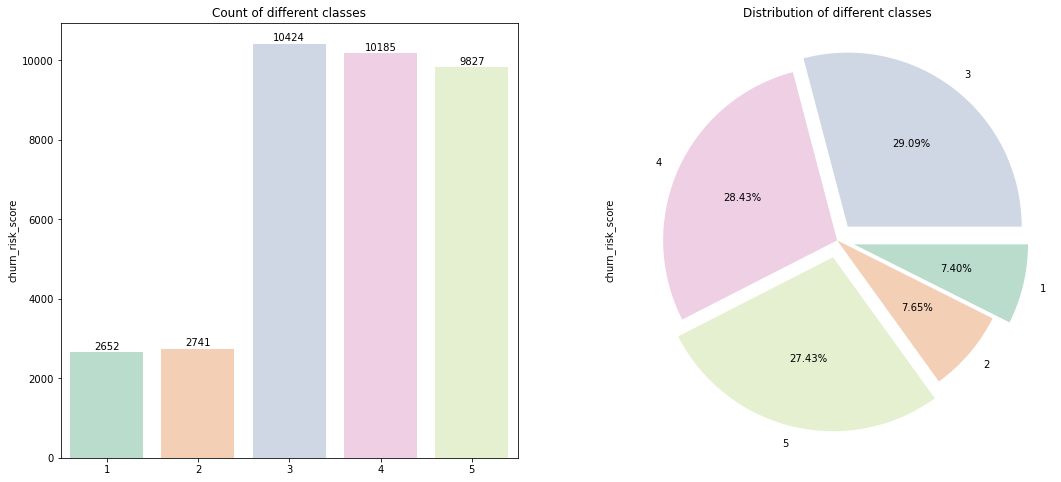

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
vc = df['churn_risk_score'].value_counts()
g = sns.barplot(x=vc.index,y=vc, palette='Pastel2')
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+20),ha='center', va='bottom',
               color= 'black')
plt.title('Count of different classes')
plt.subplot(1,2,2)
colors = ['#CFD6E4', '#EFCFE3', '#E4F0CF', '#F3CFB6', '#B9DCCC']
df['churn_risk_score'].value_counts().plot(kind='pie', explode=[0.1,0,0.1,0,0.1], autopct='%.2f%%', colors=colors)
plt.title('Distribution of different classes')
plt.show()

### Pie Chart for Internet Options Used by Client/Customer

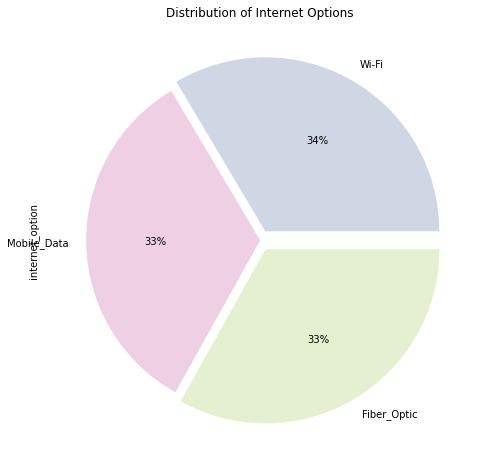

In [23]:
plt.figure(figsize=(18,8))
df['internet_option'].value_counts().plot(kind='pie', explode=[0.06,0,0.06], autopct='%.f%%', colors=colors)
plt.title('Distribution of Internet Options')
plt.show()

### Pie Chart for Medium Used by Client/Customer buying

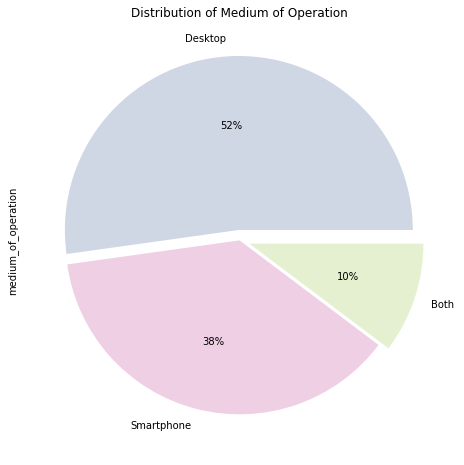

In [24]:
plt.figure(figsize=(18,8))
df['medium_of_operation'].value_counts().plot(kind='pie', explode=[0.06,0,0.06], autopct='%.f%%', colors=colors)
plt.title('Distribution of Medium of Operation')
plt.show()

### Pie Chart for from which Region customer are

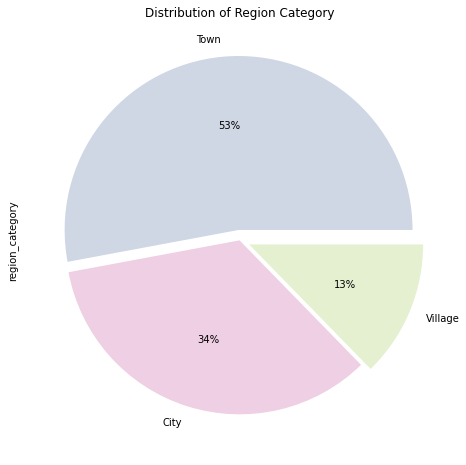

In [25]:
plt.figure(figsize=(18,8))
df['region_category'].value_counts().plot(kind='pie', explode=[0.06,0,0.06], autopct='%.f%%', colors=colors)
plt.title('Distribution of Region Category')
plt.show()

## Visualizing countplot for :
    internet_option
    medium_of_operation
    region_category
    gender
    
      w.r.t churn_risk_score

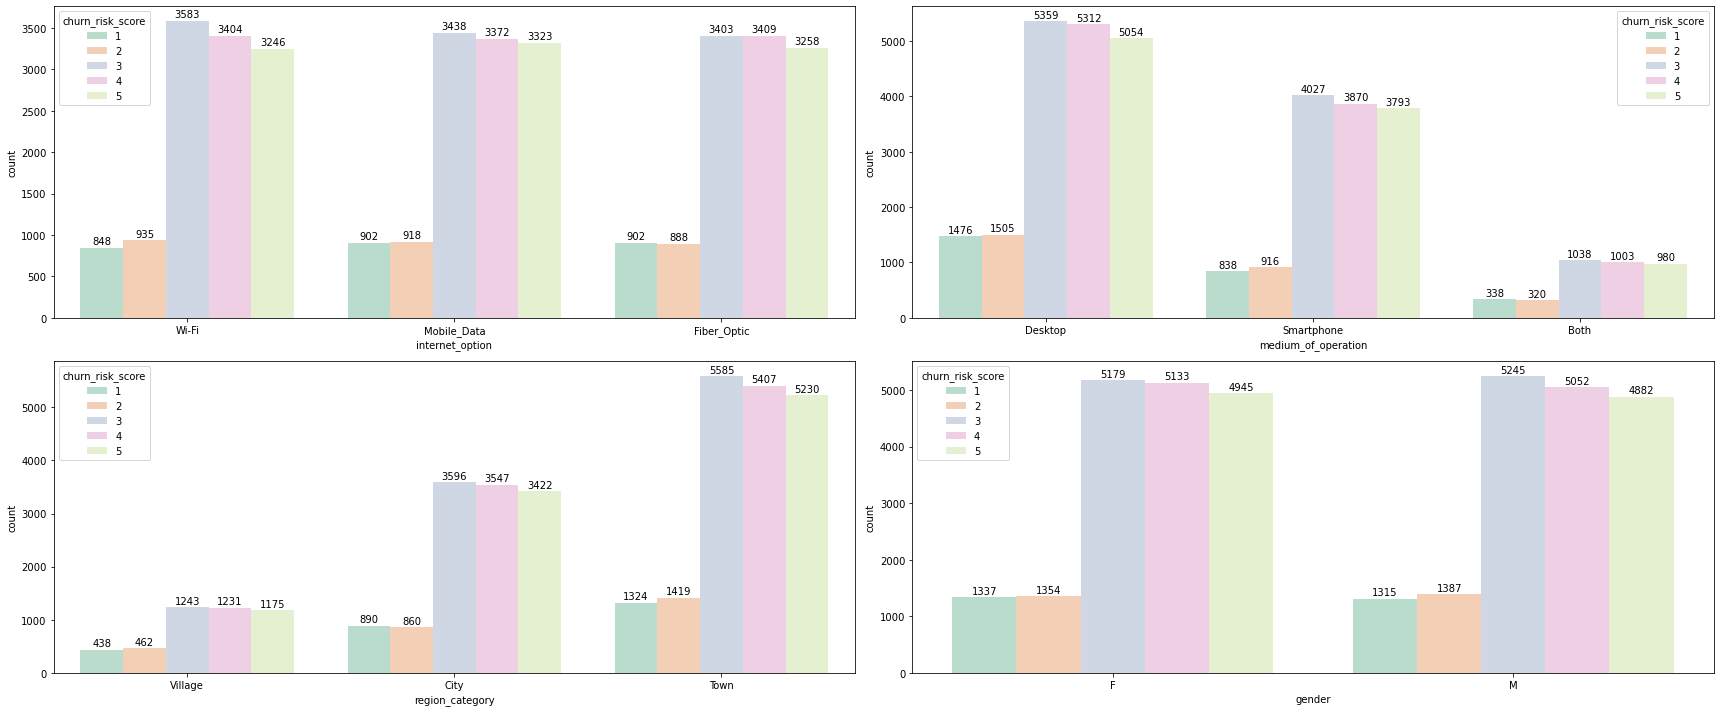

In [26]:

plt.figure(figsize=(24,10))

col= ['internet_option','medium_of_operation','region_category','gender']
i = 1
for a in col:
    
    plt.subplot(2,2,i)
    g = sns.countplot(x=a,hue='churn_risk_score',data=df,palette='Pastel2')
    for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+20),ha='center', va='bottom',
                   color= 'black')
    i = i+1
    
plt.tight_layout()

## Pre-processing

##### Handling Categorical Data

In [27]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

## Label Encoding
    Fitting data
        1. Fetching the unique value.
        2. Arrange them in ascending order.
        3. Map the values start with 0,1,2....
    
    Transforming data
        Here it actually replace the data values in the DataFrame
##### Coverting categorical features into numerical using Label_Encoder

In [28]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])

In [29]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,18,0,2,3,0,1,1,2,17,300.63,...,781.750000,1,1,0,1,4,2,17,8,2017
1,32,0,0,4,0,1,1,1,16,306.34,...,686.849231,1,0,1,2,5,1,28,8,2017
2,44,0,1,2,1,1,1,2,14,516.16,...,500.690000,0,1,1,3,3,5,11,11,2016
3,37,1,0,2,1,1,1,1,11,53.27,...,567.660000,0,1,1,4,3,5,29,10,2016
4,31,0,0,2,0,0,2,1,20,113.13,...,663.060000,0,1,1,2,3,5,12,9,2017


In [30]:
lastcolumn = df.pop('churn_risk_score')
df['churn_risk_score'] = lastcolumn
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,joining_day,joining_month,joining_year,churn_risk_score
0,18,0,2,3,0,1,1,2,17,300.63,...,781.750000,1,1,0,1,4,17,8,2017,2
1,32,0,0,4,0,1,1,1,16,306.34,...,686.849231,1,0,1,2,5,28,8,2017,1
2,44,0,1,2,1,1,1,2,14,516.16,...,500.690000,0,1,1,3,3,11,11,2016,5
3,37,1,0,2,1,1,1,1,11,53.27,...,567.660000,0,1,1,4,3,29,10,2016,5
4,31,0,0,2,0,0,2,1,20,113.13,...,663.060000,0,1,1,2,3,12,9,2017,5


In [45]:
X = df.drop('churn_risk_score',axis = 1)        # Independent Variable
Y = df['churn_risk_score']                      # Dependent Variable [target variable]
Y=Y.astype(int)

In [46]:
print(X.shape)
print(Y.shape)

(35829, 21)
(35829,)


In [47]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  

In [48]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(25080, 21)
(25080,)
(10749, 21)
(10749,)


## Scaling Data

### Using StandardScaler to scale the train and test sets into scaled versions.
    Scaling is used to ensure uniformity across the dataset ( means... not to get bais on certain features )
    We need to fit as well as transform for training part
    And for testing part we only need to transform the data

In [49]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Checking whether the data is scaled successfully or not.

In [50]:
print(X_train)
print(" ---------------------------------------------------------------------------------------------------------  ")
print(X_test)

[[-0.13747064  1.00471606 -1.20390411 ...  1.29089891  0.71533323
   1.21536271]
 [-0.70445413 -0.99530607 -1.20390411 ...  0.60899085 -1.02037382
   1.21536271]
 [-0.83045046  1.00471606 -1.20390411 ... -0.07291722 -1.59894284
  -1.22236095]
 ...
 [ 0.42951285  1.00471606  0.33581619 ... -1.66403604 -0.73108931
  -1.22236095]
 [-0.95644679 -0.99530607 -1.20390411 ...  0.15438547 -0.73108931
  -0.00349912]
 [-0.07447247 -0.99530607  0.33581619 ... -0.52752259 -0.1525203
  -1.22236095]]
 ---------------------------------------------------------------------------------------------------------  
[[-1.52343029 -0.99530607 -1.20390411 ...  0.26803682 -0.44180481
  -0.00349912]
 [ 0.80750185 -0.99530607  0.33581619 ... -1.323082   -1.30965833
   1.21536271]
 [ 1.68947617 -0.99530607 -1.20390411 ... -0.75482528  1.58318675
  -0.00349912]
 ...
 [-0.70445413  1.00471606  0.33581619 ... -1.43673335 -0.73108931
  -0.00349912]
 [-1.58642845  1.00471606 -1.20390411 ... -0.64117394  1.29390224
  -1.

## Building Model

## Descison Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

#print(list(zip(Y_test,Y_pred)))

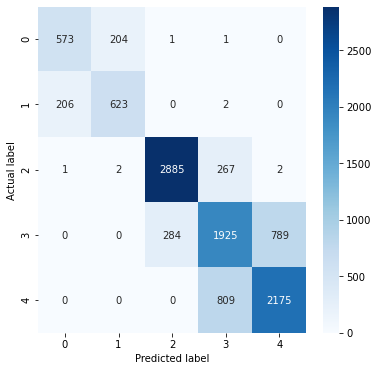

              precision    recall  f1-score   support

           1       0.73      0.74      0.74       779
           2       0.75      0.75      0.75       831
           3       0.91      0.91      0.91      3157
           4       0.64      0.64      0.64      2998
           5       0.73      0.73      0.73      2984

    accuracy                           0.76     10749
   macro avg       0.75      0.75      0.75     10749
weighted avg       0.76      0.76      0.76     10749

Accuracy of The Model : 76.10940552609546


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

### Tuning Decision Tree Using feature_importances_

In [40]:
print(list(zip(df.columns,model_DecisionTree.feature_importances_)))

[('age', 0.030297842987038234), ('gender', 0.0033784721091705207), ('region_category', 0.006873957426660239), ('membership_category', 0.20362671592669482), ('joined_through_referral', 0.0022028463050434285), ('preferred_offer_types', 0.00763074021935155), ('medium_of_operation', 0.006511808030401861), ('internet_option', 0.00810708477549146), ('days_since_last_login', 0.023628523139271388), ('avg_time_spent', 0.03822589391545), ('avg_transaction_value', 0.042399763503077614), ('avg_frequency_login_days', 0.028138932513685665), ('points_in_wallet', 0.359242733321419), ('used_special_discount', 0.002588488228645941), ('offer_application_preference', 0.0031019146629008847), ('past_complaint', 0.004953440774555852), ('complaint_status', 0.011286638994114454), ('feedback', 0.1717927800671817), ('joining_day', 0.02426055364989299), ('joining_month', 0.01579034817279922), ('joining_year', 0.005960521277152984)]


### Bar Plot graph of feature importances for better visualization

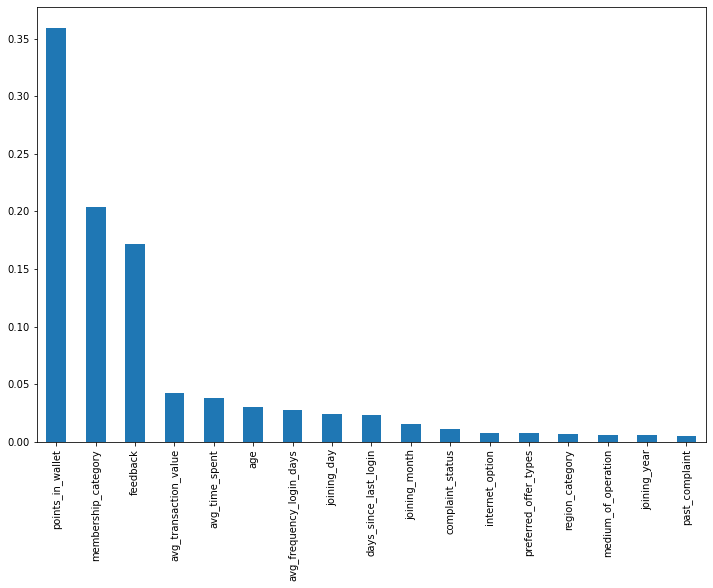

In [41]:

plt.figure(figsize = (12,8))
feat_importances = pd.Series(model_DecisionTree.feature_importances_ , index = df.columns[0:-1])
feat_importances.nlargest(17).plot(kind = 'bar')
plt.show()

In [42]:
newData = df[['points_in_wallet','membership_category','feedback','avg_transaction_value','avg_time_spent',
            'age','avg_frequency_login_days','joining_year','joining_day','complaint_status',
            'internet_option','preferred_offer_types','region_category','medium_of_operation','joining_month','past_complaint','churn_risk_score']]


X1 = newData.drop('churn_risk_score',axis = 1)        # Independent Variable
Y1 = newData['churn_risk_score']                      # Dependent Variable [target variable]
Y1=Y.astype(int)

#Split the data into test and train
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3,
                                                    random_state=10)

X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [43]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train1,Y_train1)
Y_pred1=model_DecisionTree.predict(X_test1)


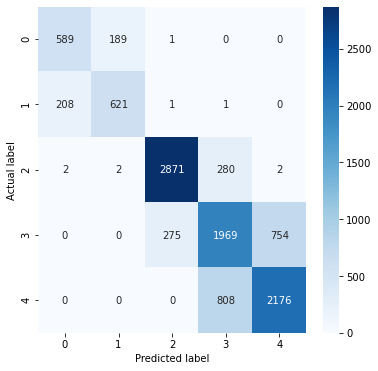

              precision    recall  f1-score   support

           1       0.74      0.76      0.75       779
           2       0.76      0.75      0.76       831
           3       0.91      0.91      0.91      3157
           4       0.64      0.66      0.65      2998
           5       0.74      0.73      0.74      2984

    accuracy                           0.77     10749
   macro avg       0.76      0.76      0.76     10749
weighted avg       0.77      0.77      0.77     10749

Accuracy of The Model : 76.52804912084845


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test1,Y_pred1)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test1,Y_pred1))
print("Accuracy of The Model :",accuracy_score(Y_test1,Y_pred1)*100)

## AdaBoost

In [51]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

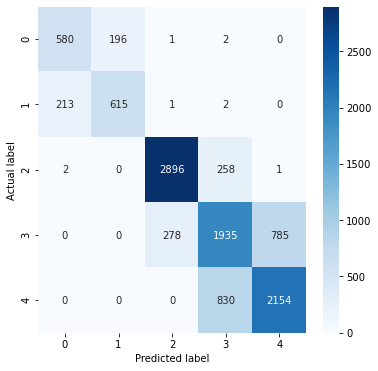

              precision    recall  f1-score   support

           1       0.73      0.74      0.74       779
           2       0.76      0.74      0.75       831
           3       0.91      0.92      0.91      3157
           4       0.64      0.65      0.64      2998
           5       0.73      0.72      0.73      2984

    accuracy                           0.76     10749
   macro avg       0.75      0.75      0.75     10749
weighted avg       0.76      0.76      0.76     10749

Accuracy of The Model : 76.10010233510094


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

## Random Forest

In [53]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

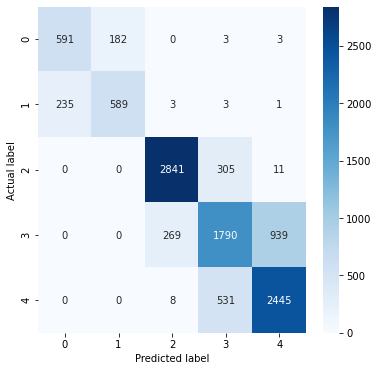

              precision    recall  f1-score   support

           1       0.72      0.76      0.74       779
           2       0.76      0.71      0.74       831
           3       0.91      0.90      0.91      3157
           4       0.68      0.60      0.64      2998
           5       0.72      0.82      0.77      2984

    accuracy                           0.77     10749
   macro avg       0.76      0.76      0.76     10749
weighted avg       0.77      0.77      0.77     10749

Accuracy of The Model : 76.80714485068378


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

### Tuning Random Forest with Hyperparameter

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(criterion='gini',n_estimators=58, random_state=10,
                                         max_features= 10,max_depth = 6,min_samples_leaf= 12,min_samples_split= 18)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

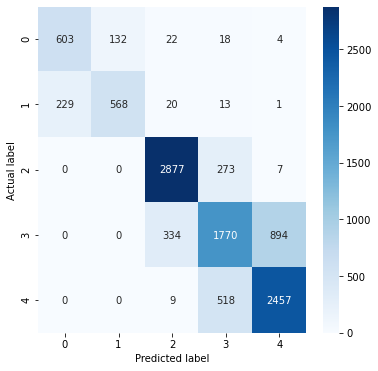

              precision    recall  f1-score   support

           1       0.72      0.77      0.75       779
           2       0.81      0.68      0.74       831
           3       0.88      0.91      0.90      3157
           4       0.68      0.59      0.63      2998
           5       0.73      0.82      0.77      2984

    accuracy                           0.77     10749
   macro avg       0.77      0.76      0.76     10749
weighted avg       0.77      0.77      0.77     10749

Accuracy of The Model : 76.98390547957949


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

## Gradient Boosting

In [57]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=150,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

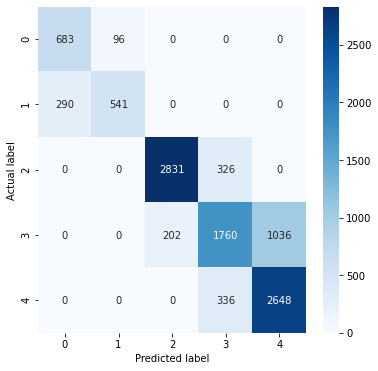

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       779
           2       0.85      0.65      0.74       831
           3       0.93      0.90      0.91      3157
           4       0.73      0.59      0.65      2998
           5       0.72      0.89      0.79      2984

    accuracy                           0.79     10749
   macro avg       0.79      0.78      0.78     10749
weighted avg       0.79      0.79      0.78     10749

Accuracy of The Model : 78.73290538654759


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

### Tuning Gradient Boosting with Hyperparameter

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=63,max_depth= 4,max_features= 12,
                                                  min_samples_leaf= 2,min_samples_split= 11,random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

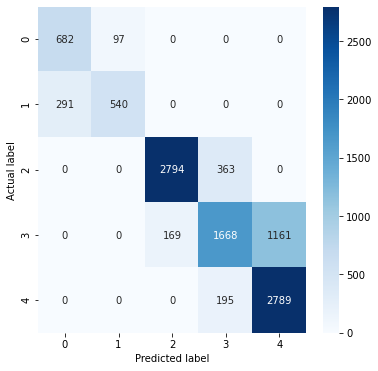

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       779
           2       0.85      0.65      0.74       831
           3       0.94      0.89      0.91      3157
           4       0.75      0.56      0.64      2998
           5       0.71      0.93      0.80      2984

    accuracy                           0.79     10749
   macro avg       0.79      0.78      0.77     10749
weighted avg       0.80      0.79      0.78     10749

Accuracy of The Model : 78.8259372964927


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

## Xtream Gradient Boosting

In [61]:
from xgboost import XGBClassifier

model_XGradientBoosting=XGBClassifier(n_estimators=150,leaning_rate = 0.01 ,max_depth = 15, random_state=10)

#fit the model on the data and predict the values
model_XGradientBoosting.fit(X_train,Y_train)

Y_pred=model_XGradientBoosting.predict(X_test)


[23:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "leaning_rate" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


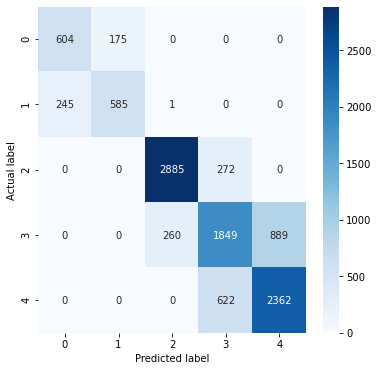

              precision    recall  f1-score   support

           1       0.71      0.78      0.74       779
           2       0.77      0.70      0.74       831
           3       0.92      0.91      0.92      3157
           4       0.67      0.62      0.64      2998
           5       0.73      0.79      0.76      2984

    accuracy                           0.77     10749
   macro avg       0.76      0.76      0.76     10749
weighted avg       0.77      0.77      0.77     10749

Accuracy of The Model : 77.0769373895246


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

## RandomizedSearchCV

### Using RandomizedSearchCV to find best parameter for XGB Classifier (Tuning XGB Classifier)

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
param_grid = {
    'learning_rate' : [1 , 0.5 , 0.1 , 0.01] ,
    'max_depth' : [3 , 5 , 10 , 20] ,
    'n_estimators' : [10 , 50 , 100 , 200]
}

In [65]:
grid = RandomizedSearchCV(XGBClassifier(objective = 'binary:logistic') , param_grid , verbose = 3)

In [66]:
grid.fit(X_train , Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.3s
[23:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.3s
[23:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation met

[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100; total time=   4.4s
[23:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100; total time=   4.5s
[23:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100; total time=   4.5s
[23:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the

[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=200; total time=  40.5s
[23:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=200; total time=  41.7s
[23:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=200; total time=  41.2s
[23:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, 

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lamb

In [67]:
grid.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

### Best parameter we get for XGB Classifier
    n_estimators : 100
    max_depth : 3
    learning_rate : 0.1

### Applying XGBoosting with best parameter we get from RandomizedSearchCV

In [68]:
from xgboost import XGBClassifier

model_XGradientBoosting=XGBClassifier(n_estimators=100,learning_rate= 0.1,max_depth=3,random_state=10)

#fit the model on the data and predict the values
model_XGradientBoosting.fit(X_train,Y_train)

Y_pred=model_XGradientBoosting.predict(X_test)

[23:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


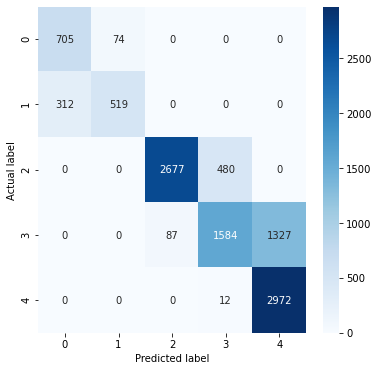

              precision    recall  f1-score   support

           1       0.69      0.91      0.79       779
           2       0.88      0.62      0.73       831
           3       0.97      0.85      0.90      3157
           4       0.76      0.53      0.62      2998
           5       0.69      1.00      0.82      2984

    accuracy                           0.79     10749
   macro avg       0.80      0.78      0.77     10749
weighted avg       0.81      0.79      0.78     10749

Accuracy of The Model : 78.67708624058052


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

## Voting Classifier

In [73]:
from sklearn.ensemble import VotingClassifier

estimator = []

estimator.append(('RF' , RandomForestClassifier(criterion='gini',n_estimators=58, random_state=10,
                                         max_features= 10,max_depth = 6,min_samples_leaf= 12,min_samples_split= 18)))

estimator.append(('GB' , GradientBoostingClassifier(n_estimators=63,max_depth= 4,max_features= 12,
                                                  min_samples_leaf= 2,min_samples_split= 11,random_state=10)))

estimator.append(('XGB' , XGBClassifier(n_estimators=100,learning_rate= 0.1,max_depth=3,random_state=10)))

votingClassifier = VotingClassifier(estimators=estimator , voting = 'hard')

votingClassifier.fit(X_train,Y_train)

Y_pred=votingClassifier.predict(X_test)

[23:46:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


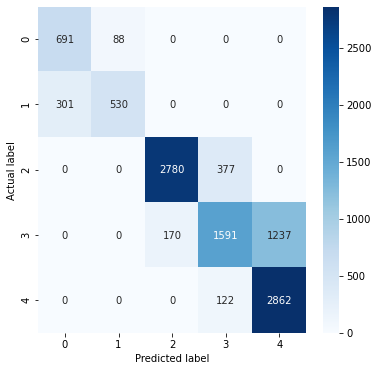

              precision    recall  f1-score   support

           1       0.70      0.89      0.78       779
           2       0.86      0.64      0.73       831
           3       0.94      0.88      0.91      3157
           4       0.76      0.53      0.63      2998
           5       0.70      0.96      0.81      2984

    accuracy                           0.79     10749
   macro avg       0.79      0.78      0.77     10749
weighted avg       0.80      0.79      0.78     10749

Accuracy of The Model : 78.64917666759699


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

In [75]:
from prettytable import PrettyTable

myTable = PrettyTable(["Algorithm", "Overall Accuracy", "Tuned Accuracy",])
  
myTable.add_row(["Decision Tree", "76.10 %", "76.52 %"])
myTable.add_row(["Random Forest", "76.80 %", "76.98 %"])
myTable.add_row(["Adaptive Boosting", "76.10 %", "-"])
myTable.add_row(["Gradient Boosting", "78.73 %", "78.82 %"])
myTable.add_row(["Xtream Gradient Boosting", "77.07 %", "78.67 %"])
myTable.add_row(["Voting Classifier", "78.64 %", "-"])

print(myTable)

+--------------------------+------------------+----------------+
|        Algorithm         | Overall Accuracy | Tuned Accuracy |
+--------------------------+------------------+----------------+
|      Decision Tree       |     76.10 %      |    76.52 %     |
|      Random Forest       |     76.80 %      |    76.98 %     |
|    Adaptive Boosting     |     76.10 %      |       -        |
|    Gradient Boosting     |     78.73 %      |    78.82 %     |
| Xtream Gradient Boosting |     77.07 %      |    78.67 %     |
|    Voting Classifier     |     78.64 %      |       -        |
+--------------------------+------------------+----------------+


               Gradient Boosting is the Optimal Model

## Testing Data

### Pre-processing on Testing Data

In [77]:
tf = pd.read_csv(r'C:\Users\Ninja Clasher\Downloads\98efc33085a711eb\dataset\test.csv' , na_values = ['?','Error','Unknown'])

tf.drop(['customer_id', 'Name' , 'security_no' ,
       'referral_id', 'last_visit_time'] , axis = 1 , inplace = True)

tf['region_category'] = tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types'] = tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])
tf['points_in_wallet'] = tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

tf['gender'] = tf['gender'].fillna(tf['gender'].mode()[0])

tf['joined_through_referral'] = tf['joined_through_referral'].fillna(tf['joined_through_referral'].mode()[0])
tf['medium_of_operation'] = tf['medium_of_operation'].fillna(tf['medium_of_operation'].mode()[0])
tf['avg_frequency_login_days'] = tf['avg_frequency_login_days'].fillna(tf['avg_frequency_login_days'].mean())


tf['joining_day'] = pd.to_datetime(tf.joining_date , format = "%Y/%m/%d").dt.day
tf['joining_month'] = pd.to_datetime(tf.joining_date , format = "%Y/%m/%d").dt.month
tf['joining_year'] = pd.to_datetime(tf.joining_date , format = "%Y/%m/%d").dt.year

tf.drop(['joining_date'] , axis = 1 , inplace = True)


colname=[]
for x in tf.columns:
    if tf[x].dtype=='object':
        colname.append(x)
        

for x in colname:
    tf[x]=le.fit_transform(tf[x])

                                                                       
#tf.head()                                                                       
test = scaler.transform(tf)


### Applying Tuned Gradient Boosting Classifier on Testing Data

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=63,max_depth= 4,max_features= 12,
                                                  min_samples_leaf= 2,min_samples_split= 11,random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(test)

In [79]:
Y_pred

array([3, 3, 3, ..., 5, 4, 3])

In [80]:
testing_data = pd.read_csv(r'C:\Users\Ninja Clasher\Downloads\98efc33085a711eb\dataset\test.csv' , na_values = ['?','Error','Unknown'])

Churn_Risk_Score=testing_data[['customer_id','Name']]
Churn_Risk_Score['Churn Score'] = Y_pred

In [81]:
Churn_Risk_Score

,customer_id,Name,Churn Score
0,fffe43004900440031003700300030003400,Alethia Meints,3
1,fffe43004900440031003900370037003300,Ming Lopez,3
2,fffe43004900440034003800360037003000,Carina Flannigan,3
3,fffe43004900440036003200370033003400,Kyung Wanner,3
4,fffe43004900440035003000370031003900,Enola Gatto,5
...,...,...,...
19914,fffe43004900440035003600330037003800,Kraig Peele,3
19915,fffe43004900440032003900370037003100,Damaris Sabol,5
19916,fffe43004900440036003100310036003700,Loura Huckstep,5
19917,fffe43004900440034003200330033003600,Sharita Clubb,4


In [82]:
Churn_Risk_Score.to_csv('Customer_Churn_Score Data.csv')

### Some suggesstion to the company

    Firstly company should more focus to that customer whose having a churn score of 4 and 5.
    They should cash back on product or we can say give more offer to the customer.
    Give more attention.
    Asking them what more things added to a particular product to enchane thier product quality.
